In [ ]:
'''
DataFrame은 2차원 배열형식
표같은 스프래드시트 자료구조
여러개의 컬럼을 가지고 서로다른 구조의 값이 담긴다.

DataFrame은 다양한 방법으로 생성
1)리스트 값을 딕셔너리로 사용
2)Numpy배열을 이용
3)read_csv(), read_excel() 함수등을 이용
'''

## DataFrame
### DataFrame 생성하기

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [9]:
# 1-1. 딕셔너리를 이용해서 DataFrame 생성
list_dic = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'],
            'year':[2000,2001,2002,2001,2002,2003],
            'pop':[1.5,1.7,3.6,2.4,2.9,3.2]
            }
listDf = DataFrame(list_dic)
print(listDf)
print('*'*40)
print(listDf.state)
print(type(listDf.state))
print(listDf.year)
#print(listDf.pop)      #내장함수명이랑 동일해서 값이 제대로 안나온다
print(listDf['pop'])

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2
****************************************
0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object
<class 'pandas.core.series.Series'>
0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64
0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pop, dtype: float64


In [13]:
data1 = {'name':['James','Peter','Tomas','Robert'],
        'address':['NY','NY','LA','Texas'],
        'age':[33,44,55,66]
        }
df1 = DataFrame(data1)
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Tomas,LA,55
3,Robert,Texas,66


In [17]:
#1-2 Numpy 배열을 이용 :: 1)array() 2)random
np.random.seed(100)
df2 = DataFrame(np.random.randint(10,100,16).reshape(4,4),
               index=list('abcd'),columns=list('abcd'))
#컬럼명 수정하기
df2.columns=['one','two','three','four']
df2

,one,two,three,four
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


In [18]:
# 1-3 read_csv() 사용
'''
csv(Comma Seperated Value)
csv 파일 포멧은 데이타 값이 쉼표(,)로 구분되는 텍스트 파일이다.

누락데이타가 어디에 들어있는지 휘리릭 확인
'''
df3 = pd.read_csv('../data/tips.csv')
df3

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


### DataFrame - 구조 확인

In [55]:
'''
index, values, columns, dtype
'''
print(df3.index)
print('*'*40)
print(df3.columns)
print('*'*40)
print(df3.values)
print(df3.dtypes)
print('*'*40)
df3.info()    #컬럼에 대한 전반적인 정보

RangeIndex(start=0, stop=245, step=1)
****************************************
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
****************************************
[[16.99 1.01 'Female' ... 'Sun' 'Dinner' 2.0]
 [10.34 1.66 'Male' ... 'Sun' 'Dinner' 3.0]
 [21.01 3.5 'Male' ... 'Sun' 'Dinner' 3.0]
 ...
 [17.82 1.75 'Male' ... 'Sat' 'Dinner' 2.0]
 [18.78 3.0 'Female' ... 'Thur' 'Dinner' 2.0]
 [25.34 nan nan ... nan nan nan]]
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size          float64
dtype: object
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker    

In [29]:
# 가장 많이 사용되는 조회함수
df3
df3.head(3)
df3.head()
df3.head(5)
df3.tail(2)
df3.tail()
df3.info()
df3.shape    #몇행몇열인지 알려줌... 튜플형태로 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


(245, 7)

### DataFrame - 컬럼명 변경 및 추가

In [31]:
#1. 컬럼명 변경
'''
1) 컬럼명 전체 수정... columns
2) 컬럼명 부분 수정... rename

'''
df2
df2.columns = ['A-class', 'B-class', 'C-class', 'D-class']    #원본이 바로 바뀜
df2

,A-class,B-class,C-class,D-class
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


In [35]:
#1. 컬럼명 변경 2)
df1
df1.rename(columns={'address':'addr'}, inplace=True)    # 원본은 안바뀜
# df1.rename?
df1

,name,addr,age
0,James,NY,33
1,Peter,NY,44
2,Tomas,LA,55
3,Robert,Texas,66


In [38]:
#2. 컬럼추가
print(df1)
df1['phone'] = np.nan
df1

     name   addr  age
0   James     NY   33
1   Peter     NY   44
2   Tomas     LA   55
3  Robert  Texas   66


,name,addr,age,phone
0,James,NY,33,NaN
1,Peter,NY,44,NaN
2,Tomas,LA,55,NaN
3,Robert,Texas,66,NaN


### DataFrame - 조회하기(인덱싱, 슬라이싱)

In [40]:
df2.columns = ['one', 'two', 'three', 'four']
df2

,one,two,three,four
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


In [43]:
df2[0:2]
df2['a':'b']    #라벨로 조회할때는 뒷부분이 포함된다.

df2['one':'three']      #인덱스 부분에 없는 요소이기에 해더만 출력. 칼람조회는 다른방식이다

,one,two,three,four


In [123]:
# 컬럼명 조회
df2[['one','three']]      #2차원 배열이기 때문에 이렇게 해야함

#two 칼람에 해당하는 값....중에서 45보다 큰값만 추출해서 출력
print(df2['two']>45)        #'two' 컬럼에서 45보다 큰거
print('*'*40)
print(df2[df2['two']>45])    # 그 값을 보이기 ---> 다른 주위에값들도 같이나옴
print('*'*40)
d=df2[df2.iloc[:,1:2]>45]
print(d)
print('*'*40)
df2[df2['two']>45].iloc[:,1:2]

a    False
b     True
c     True
d    False
Name: two, dtype: bool
****************************************
   one  two  three  four
b   89   58     20    62
c   63   76     24    44
****************************************
   one   two  three  four
a  NaN   NaN    NaN   NaN
b  NaN  58.0    NaN   NaN
c  NaN  76.0    NaN   NaN
d  NaN   NaN    NaN   NaN
****************************************


,two
b,58
c,76


### loc,iloc | at, iat

In [57]:
df1

,name,addr,age,phone
0,James,NY,33,NaN
1,Peter,NY,44,NaN
2,Tomas,LA,55,NaN
3,Robert,Texas,66,NaN


In [69]:
print(df1.iloc[0:2,0:3])    #행,렬
print('*'*40)

print(df1.iloc[:2,:3])
print('*'*40)

print(df1.loc[:1,'name':'age']) 
print('*'*40)

#아래두개는 똑같이 나온다
print(df1.loc[0:1])
print(df1.iloc[0:2]) 

    name addr  age
0  James   NY   33
1  Peter   NY   44
****************************************
    name addr  age
0  James   NY   33
1  Peter   NY   44
****************************************
    name addr  age
0  James   NY   33
1  Peter   NY   44
****************************************
    name addr  age  phone
0  James   NY   33    NaN
1  Peter   NY   44    NaN
    name addr  age  phone
0  James   NY   33    NaN
1  Peter   NY   44    NaN


In [78]:
# 스칼라값 가져오기
# loc, iloc는 스칼라값을 가져오는 용도는 아니다.
print(df1)
print('*'*40)
print(df1.iloc[1:3])
print(df1.loc[1:2])
print('*'*40)
print(df1.iat[1,1])
print(df1.at[1,'addr'])
print('*'*40)
print(df1.iat[3,2])
print(df1.at[3,'age'])
print('*'*40)
df1.at[3,'age']=69
print(df1.at[3,'age'])


     name   addr  age  phone
0   James     NY   33    NaN
1   Peter     NY   44    NaN
2   Tomas     LA   55    NaN
3  Robert  Texas   66    NaN
****************************************
    name addr  age  phone
1  Peter   NY   44    NaN
2  Tomas   LA   55    NaN
    name addr  age  phone
1  Peter   NY   44    NaN
2  Tomas   LA   55    NaN
****************************************
NY
NY
****************************************
66
66
****************************************
69


In [ ]:
#loc를 이용해서 row추가하기

In [82]:
df1.loc[4]=np.nan      #데이터 추가
df1

,name,addr,age,phone
0,James,NY,33.0,NaN
1,Peter,NY,44.0,NaN
2,Tomas,LA,55.0,NaN
3,Robert,Texas,69.0,NaN
4,NaN,NaN,NaN,NaN


### 삭제하기... drop()

In [83]:
df1.drop(4)
df1   #원본데이터는 삭제되지 않는다.... inplace = True

,name,addr,age,phone
0,James,NY,33.0,NaN
1,Peter,NY,44.0,NaN
2,Tomas,LA,55.0,NaN
3,Robert,Texas,69.0,NaN
4,NaN,NaN,NaN,NaN


In [91]:
df1.drop(4)    # axis가 기본으로 0이다 행이 삭제되는것이다. 
df1.drop('phone', axis=1, inplace=True)

KeyError: "['phone'] not found in axis"

In [93]:
df1.drop(4, inplace=True)

In [94]:
df1

,name,addr,age
0,James,NY,33.0
1,Peter,NY,44.0
2,Tomas,LA,55.0
3,Robert,Texas,69.0


### DataFrame - 정렬하기

In [95]:
df2

,one,two,three,four
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


In [104]:
print(df2.sort_index())      #shift + tab 누르면 ?랑 같은 거 나온당 
print(df2.sort_index(axis=1))
print(df2.sort_index(axis=1, ascending=False))
print(df2.sort_values(by='four'))

   one  two  three  four
a   18   34     77    97
b   89   58     20    62
c   63   76     24    44
d   34   25     70    68
   four  one  three  two
a    97   18     77   34
b    62   89     20   58
c    44   63     24   76
d    68   34     70   25
   two  three  one  four
a   34     77   18    97
b   58     20   89    62
c   76     24   63    44
d   25     70   34    68
   one  two  three  four
c   63   76     24    44
b   89   58     20    62
d   34   25     70    68
a   18   34     77    97
   one  two  three  four
c   63   76     24    44
b   89   58     20    62
d   34   25     70    68
a   18   34     77    97


### 실전데이타로 응용하기

In [125]:
df3.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0


### 문제1. tip의 비율로 sort(내림 차순)... 상위 5개만 출력

In [130]:
df3.sort_values(by=['tip'], ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0
59,48.27,6.73,Male,No,Sat,Dinner,4.0
141,34.30,6.70,Male,No,Thur,Lunch,6.0


In [131]:
import matplotlib.pyplot as plt

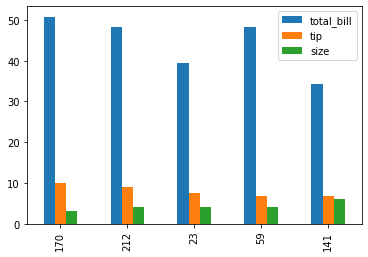

In [132]:
df3.sort_values(by=['tip'], ascending=False).head(5).plot(kind='bar')
plt.show()

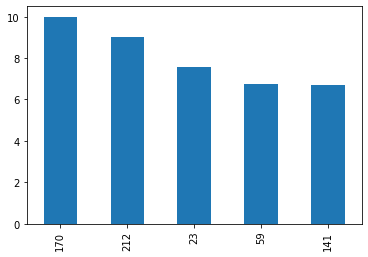

In [134]:
df3.sort_values(by=['tip'], ascending=False).head(5)['tip'].plot(kind='bar')
plt.show()

#### 문제2. day, tip별로 정렬.... 각각 정렬을 다르게(내림, 오름차순), 마지막데이타 7줄만 출력

In [136]:
df3.sort_values(by=['day','tip'], ascending=[False,True]).tail(7)

,total_bill,tip,sex,smoker,day,time,size
94,22.75,3.25,Female,No,Fri,Dinner,2.0
221,13.42,3.48,Female,Yes,Fri,Lunch,2.0
91,22.49,3.50,Male,No,Fri,Dinner,2.0
96,27.28,4.00,Male,Yes,Fri,Dinner,2.0
93,16.32,4.30,Female,Yes,Fri,Dinner,2.0
95,40.17,4.73,Male,Yes,Fri,Dinner,4.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN


## 알아두면 유용한 함수들...

In [139]:
#1. unique() 중복을 제거해주는 함수 sql에서 distinic와 동일한 기능
df3['day']
df3['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri', nan], dtype=object)

In [140]:
#2. 각각의 컬럼들에 해당하는 값이 갯수
df3['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [145]:
#3. isin() ---- 
'''
unique()함수를 이용해서 우선 어떤 요일이 있는지부터 확인
그중에서
토,일요일에 있는 데이타들만 검색....
isin(['Sat','Sun'])

'''
df3['day'].unique()
df3[df3['day'].isin(['Thur','Fri'])]
df3[df3['day'].isin(['Fri'])]

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2.0
91,22.49,3.50,Male,No,Fri,Dinner,2.0
92,5.75,1.00,Female,Yes,Fri,Dinner,2.0
93,16.32,4.30,Female,Yes,Fri,Dinner,2.0
94,22.75,3.25,Female,No,Fri,Dinner,2.0
95,40.17,4.73,Male,Yes,Fri,Dinner,4.0
96,27.28,4.00,Male,Yes,Fri,Dinner,2.0
97,12.03,1.50,Male,Yes,Fri,Dinner,2.0
98,21.01,3.00,Male,Yes,Fri,Dinner,2.0
99,12.46,1.50,Male,No,Fri,Dinner,2.0


In [149]:
#4. isnull() ... 누락데이타확인하기.... Nan...
df3.isnull().sum()
df3.isnull().sum(axis=1)


0      0
1      0
2      0
3      0
4      0
      ..
240    0
241    0
242    0
243    0
244    6
Length: 245, dtype: int64